**WEB SCRAPING**

In [8]:
import requests
x = 2;
#link ="https://www.trustpilot.com/review/www.triaddogfence.com"
#link = "https://www.trustpilot.com/review/efile4biz.com"
link = "https://www.trustpilot.com/review/www.nike.com"
#link ="https://www.trustpilot.com/review/www.amazon.com"
#link = "https://www.trustpilot.com/review/www.lufthansa.com"
page="?page="
req = requests.get(link)
currentPage = req.url
print(currentPage)
url = link 
print(url)

reviewStar = []
reviewContent = []
reviewTitle = []
time = []

while (True):
    print('Title: ',len(reviewTitle))
    print('Comment: ',len(reviewContent))
    url = link + page + str(x)
    htmlText = req.text
    splitList = htmlText.split("review-title")
    del(splitList[0])
    
    listRange = len(splitList)
    NoComment=[]
    titleNo =0
    for i in range(listRange):
        afterFirstSplit = splitList[i].split('">')[1]
        if 'review-content__text' not in afterFirstSplit:
            print("No comment exist for number ", i ," review in page ", x-1 )
            print(i)
            NoComment.append(i)
        afterSecondSplit = afterFirstSplit.split('</a>')[0]
        i += 1
        titleNo += 1
        reviewTitle.append(afterSecondSplit)
    #print(reviewTitle)
    
    
    
    splitList = htmlText.split("review-content__text")
    del(splitList[0])

    listRange = len(splitList)
    commentNo =0
    for i in range(listRange):
        if i in NoComment:
            reviewContent.append(" ") # No comment
            commentNo += 1
        afterFirstSplit = splitList[i].split('>\n            ')[1]
        afterSecondSplit = afterFirstSplit.split('\n            </p>')[0]
        reviewContent.append(afterSecondSplit)
        commentNo += 1
        i += 1
    while (titleNo>commentNo):
        print('titleNo: ',titleNo)
        print('commentNo: ',commentNo)
        reviewContent.append(" ")
        commentNo += 1

    splitList = htmlText.split('publishedDate":')
    del(splitList[0])
    listRange = len(splitList)
    for i in range(listRange):
        afterFirstSplit = splitList[i].split('"')[1]
        afterSecondSplit = afterFirstSplit.split('T')[0]
        i += 1
        time.append(afterSecondSplit)
        
        
        
    splitList = htmlText.split("star-rating star-rating--medium")
    del(splitList[0])
    
    listRange = len(splitList)
    for i in range(listRange):
        afterFirstSplit = splitList[i].split('stars/stars-')[1]
        afterSecondSplit = afterFirstSplit.split('.svg')[0]
        i += 1
        reviewStar.append(afterSecondSplit)
    
    print(url)
    x+=1
    req = requests.get(url)
    currentPage = req.url
    print(currentPage)
    print(currentPage != link)
    if (currentPage == link):
        break

        
print('rating: ',len(reviewStar))        
print('Title: ',len(reviewTitle))
print('Comment: ',len(reviewContent))
print('time: ',len(time))
#print(reviewStar)        
import pandas as pd
dataset = pd.DataFrame({'Rating': reviewStar, 'Title': reviewTitle, 'Comment': reviewContent, 'time': time})
dataset.to_csv(r'C:\Users\Nike.csv', index = None, header=True)
dataset


https://www.trustpilot.com/review/www.nike.com
https://www.trustpilot.com/review/www.nike.com
Title:  0
Comment:  0
https://www.trustpilot.com/review/www.nike.com?page=2
https://www.trustpilot.com/review/www.nike.com?page=2
True
Title:  20
Comment:  20
https://www.trustpilot.com/review/www.nike.com?page=3
https://www.trustpilot.com/review/www.nike.com?page=3
True
Title:  40
Comment:  40
https://www.trustpilot.com/review/www.nike.com?page=4
https://www.trustpilot.com/review/www.nike.com?page=4
True
Title:  60
Comment:  60
https://www.trustpilot.com/review/www.nike.com?page=5
https://www.trustpilot.com/review/www.nike.com?page=5
True
Title:  80
Comment:  80
https://www.trustpilot.com/review/www.nike.com?page=6
https://www.trustpilot.com/review/www.nike.com?page=6
True
Title:  100
Comment:  100
No comment exist for number  16  review in page  6
16
https://www.trustpilot.com/review/www.nike.com?page=7
https://www.trustpilot.com/review/www.nike.com?page=7
True
Title:  120
Comment:  120
No c

Rating                                             Title  \
0         5  I don&#8217;t usually leave reviews but I&#8230;   
1         5                             Good Customer Service   
2         1          If there&#39;s the option to give 0 star   
3         1                        Do NOT order from Nike.com   
4         1                                 About 2 weeks ago   
...     ...                                               ...   
1443      5                   Exceptional service as standard   
1444      5                                    Great Trainers   
1445      3             Great Product, But out of stock often   
1446      4            I bought nice hiking boots for my kids   
1447      5                                           Awesome   

                                                Comment        time  
0         I don&#8217;t usually leave reviews but I ...  2020-05-18  
1         I ordered 3 pairs of shoes April 30. As ex...  2020-05-18  
2         If there&#39;s the option to give 0 star, ...  2020-05-18  
3         Nike sent me the ugliest shoes I&#39;ve ev...  2020-05-18  
4         About 2 weeks ago, I&#39;ve been trying to...  2020-05-18  
...                                                 ...         ...  
1443      I ordered some items which unfortunately d...  2011-08-11  
1444      Recieved a fantastic pair of trainers here...  2010-11-13  
1445      This site is the bomb! but quite often I f...  2010-11-11  
1446      I bought nice hiking boots for my kids, an...  2010-04-27  
1447      I love this website, the stuff is really g...  2009-12-03  

[1448 rows x 4 columns]

In [9]:
import datetime
time = [datetime.datetime.strptime(x, '%Y-%m-%d').date() for x in time]

In [11]:
time[0].month

5

In [15]:
dataset.Comment[0]

'    I don&#8217;t usually leave reviews but I waited on the phone for about an hour and wasn&#8217;t really expecting to get such good customer service but LISA IS AN ABSOLUTE GEM, she gave me a discount on my custom shoes that weren&#8217;t exactly how I wanted and helped me get my other order figured out within 10 minutes, she deserves a raise!!'

**Cleaning the Comments**

In [17]:
#removing <br />
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('<br />',' '))
#Replacing  &#39; to '
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&#39;',"'"))
#Replacing  &#8221; to "
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&#8221;','"'))
#Replacing  &#8220; to "
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&#8220;','"'))
#Replacing  &#8217; to '
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&#8217;',"'"))
#Replacing  &#8364; to €
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&#8364;',"€"))
#Replacing  &gt; to >
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&gt;',">"))
#Replacing  &amp; to &
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&amp;',"&"))
#Replacing &quot; to & "
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&quot;','"'))
#Removing &#8216; 
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace('&#8216;',''))
#Removing \' 
dataset['Comment'] = dataset['Comment'].map(lambda x: x.replace("\'",""))
dataset['Comment'][0]

'    I dont usually leave reviews but I waited on the phone for about an hour and wasnt really expecting to get such good customer service but LISA IS AN ABSOLUTE GEM, she gave me a discount on my custom shoes that werent exactly how I wanted and helped me get my other order figured out within 10 minutes, she deserves a raise!!'

**Cleaning the Titles**

In [19]:
#removing &#8230;
dataset['Title'] = dataset['Title'].map(lambda x: x.replace('&#8230;',''))
#Replacing  &#39; to '
dataset['Title'] = dataset['Title'].map(lambda x: x.replace('&#39;',"'"))
dataset['Title'][0]

'I don&#8217;t usually leave reviews but I'

In [21]:
import spacy
from spacy import displacy
import en_core_web_lg
nlp = en_core_web_lg.load()

In [25]:
text = nlp(dataset['Comment'][2])
displacy.render(text,style='ent', jupyter=True)

In [27]:
text = nlp(dataset['Comment'][2])
colorGradient = {'DATE':'linear-gradient(90deg, #aa9cfc, #fc9ce7)'}
colors = {'DATE':'red'}
displacy.render(text,style='ent', jupyter=True, options={'ents':['DATE'], 'colors':colorGradient})

In [28]:
text = nlp(dataset['Comment'][71])
colorGradient = {'ORG':'linear-gradient(90deg, #eeff88, #ff2211)'}
colors = {'DATE':'red'}
displacy.render(text,style='ent', jupyter=True, options={'ents':['ORG'], 'colors':colorGradient})


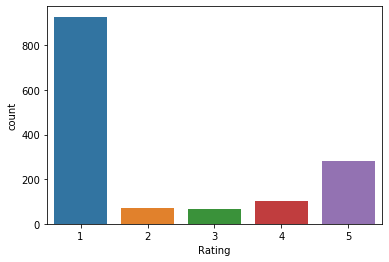

In [31]:
import seaborn as sns
sns.countplot(x="Rating", data=dataset)

In [32]:
dataset['length'] = dataset["Comment"].apply(lambda x: len(x) - x.count(" "))
dataset.head()

Rating                                      Title  \
0      5  I don&#8217;t usually leave reviews but I   
1      5                      Good Customer Service   
2      1       If there's the option to give 0 star   
3      1                 Do NOT order from Nike.com   
4      1                          About 2 weeks ago   

                                             Comment        time  length  
0      I dont usually leave reviews but I waited ...  2020-05-18     263  
1      I ordered 3 pairs of shoes April 30. As ex...  2020-05-18     585  
2      If theres the option to give 0 star, I wou...  2020-05-18     924  
3      Nike sent me the ugliest shoes Ive ever se...  2020-05-18    1066  
4      About 2 weeks ago, Ive been trying to reso...  2020-05-18     840

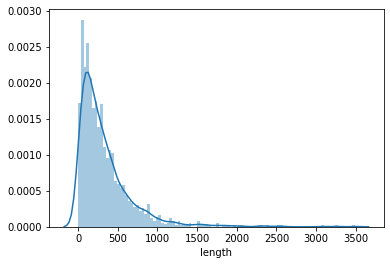

In [33]:
sns.distplot(dataset['length'],bins=100);

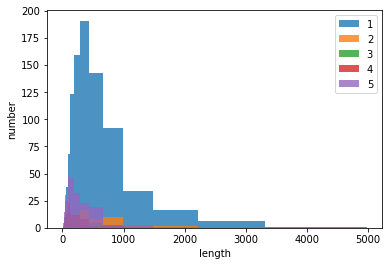

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

bins = 1.5**(np.arange(0,22))
plt.hist(dataset[dataset['Rating']=='1']['length'], bins=bins,alpha=0.8)
plt.hist(dataset[dataset['Rating']=='2']['length'], bins=bins,alpha=0.8)
plt.hist(dataset[dataset['Rating']=='3']['length'], bins=bins,alpha=0.8)
plt.hist(dataset[dataset['Rating']=='4']['length'], bins=bins,alpha=0.8)
plt.hist(dataset[dataset['Rating']=='5']['length'], bins=bins,alpha=0.8)
plt.legend(('1','2','3','4','5'))
plt.xlabel("length")
plt.ylabel("number")
plt.show()

**Sentiment Analyzer**

In [42]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Firoozeh\AppData\Roaming\nltk_data...


True

In [43]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [44]:
dataset['scores'] = dataset['Comment'].apply(lambda Comment: sid.polarity_scores(Comment)) 
dataset.head()

Rating                                      Title  \
0      5  I don&#8217;t usually leave reviews but I   
1      5                      Good Customer Service   
2      1       If there's the option to give 0 star   
3      1                 Do NOT order from Nike.com   
4      1                          About 2 weeks ago   

                                             Comment        time  length  \
0      I dont usually leave reviews but I waited ...  2020-05-18     263   
1      I ordered 3 pairs of shoes April 30. As ex...  2020-05-18     585   
2      If theres the option to give 0 star, I wou...  2020-05-18     924   
3      Nike sent me the ugliest shoes Ive ever se...  2020-05-18    1066   
4      About 2 weeks ago, Ive been trying to reso...  2020-05-18     840   

                                              scores  
0  {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
2  {'neg': 0.056, 'neu': 0.86, 'pos': 0.084, 'com...  
3  {'neg': 0.084, 'neu': 0.851, 'pos': 0.065, 'co...  
4  {'neg': 0.117, 'neu': 0.796, 'pos': 0.086, 'co...

In [45]:
dataset.Comment[0]

'    I dont usually leave reviews but I waited on the phone for about an hour and wasnt really expecting to get such good customer service but LISA IS AN ABSOLUTE GEM, she gave me a discount on my custom shoes that werent exactly how I wanted and helped me get my other order figured out within 10 minutes, she deserves a raise!!'

In [46]:
dataset.scores[0]

{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.6713}

In [47]:
dataset['compound'] = dataset['scores'].apply(lambda d:d['compound'])
dataset.head()

Rating                                      Title  \
0      5  I don&#8217;t usually leave reviews but I   
1      5                      Good Customer Service   
2      1       If there's the option to give 0 star   
3      1                 Do NOT order from Nike.com   
4      1                          About 2 weeks ago   

                                             Comment        time  length  \
0      I dont usually leave reviews but I waited ...  2020-05-18     263   
1      I ordered 3 pairs of shoes April 30. As ex...  2020-05-18     585   
2      If theres the option to give 0 star, I wou...  2020-05-18     924   
3      Nike sent me the ugliest shoes Ive ever se...  2020-05-18    1066   
4      About 2 weeks ago, Ive been trying to reso...  2020-05-18     840   

                                              scores  compound  
0  {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...    0.6713  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
2  {'neg': 0.056, 'neu': 0.86, 'pos': 0.084, 'com...    0.7234  
3  {'neg': 0.084, 'neu': 0.851, 'pos': 0.065, 'co...   -0.5940  
4  {'neg': 0.117, 'neu': 0.796, 'pos': 0.086, 'co...   -0.8604

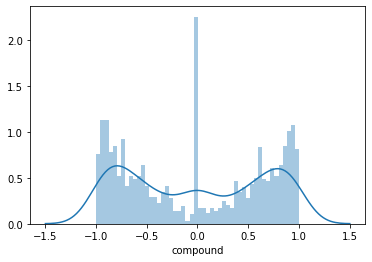

In [48]:
#Sentiment Polarity Distribution
sns.distplot(dataset['compound'],bins=50);

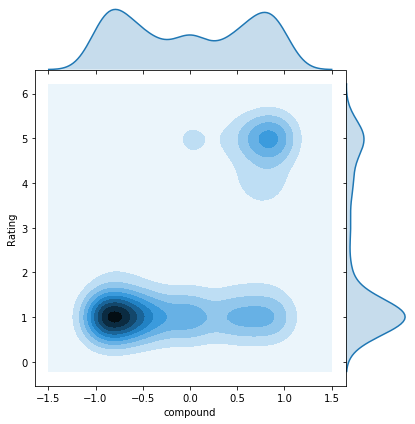

In [49]:
g = sns.jointplot("compound", "Rating", data=dataset, kind="kde", space=0)

In [50]:
dataset['sentiment_score'] = dataset['compound'].apply(lambda score:"positive" if score >= 0.1 else ("negative" if score <= -0.1 else "nutral"))
dataset.head()

Rating                                      Title  \
0      5  I don&#8217;t usually leave reviews but I   
1      5                      Good Customer Service   
2      1       If there's the option to give 0 star   
3      1                 Do NOT order from Nike.com   
4      1                          About 2 weeks ago   

                                             Comment        time  length  \
0      I dont usually leave reviews but I waited ...  2020-05-18     263   
1      I ordered 3 pairs of shoes April 30. As ex...  2020-05-18     585   
2      If theres the option to give 0 star, I wou...  2020-05-18     924   
3      Nike sent me the ugliest shoes Ive ever se...  2020-05-18    1066   
4      About 2 weeks ago, Ive been trying to reso...  2020-05-18     840   

                                              scores  compound sentiment_score  
0  {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...    0.6713        positive  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000          nutral  
2  {'neg': 0.056, 'neu': 0.86, 'pos': 0.084, 'com...    0.7234        positive  
3  {'neg': 0.084, 'neu': 0.851, 'pos': 0.065, 'co...   -0.5940        negative  
4  {'neg': 0.117, 'neu': 0.796, 'pos': 0.086, 'co...   -0.8604        negative

In [51]:
dataset['Rating'] = dataset['Rating'].astype(int)
dataset ['Rating_Change'] = dataset['Rating'].apply(lambda rate:"positive" if rate >= 4 else ("negative" if rate <= 2 else "nutral"))
dataset.head()

Rating                                      Title  \
0       5  I don&#8217;t usually leave reviews but I   
1       5                      Good Customer Service   
2       1       If there's the option to give 0 star   
3       1                 Do NOT order from Nike.com   
4       1                          About 2 weeks ago   

                                             Comment        time  length  \
0      I dont usually leave reviews but I waited ...  2020-05-18     263   
1      I ordered 3 pairs of shoes April 30. As ex...  2020-05-18     585   
2      If theres the option to give 0 star, I wou...  2020-05-18     924   
3      Nike sent me the ugliest shoes Ive ever se...  2020-05-18    1066   
4      About 2 weeks ago, Ive been trying to reso...  2020-05-18     840   

                                              scores  compound  \
0  {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...    0.6713   
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   
2  {'neg': 0.056, 'neu': 0.86, 'pos': 0.084, 'com...    0.7234   
3  {'neg': 0.084, 'neu': 0.851, 'pos': 0.065, 'co...   -0.5940   
4  {'neg': 0.117, 'neu': 0.796, 'pos': 0.086, 'co...   -0.8604   

  sentiment_score Rating_Change  
0        positive      positive  
1          nutral      positive  
2        positive      negative  
3        negative      negative  
4        negative      negative

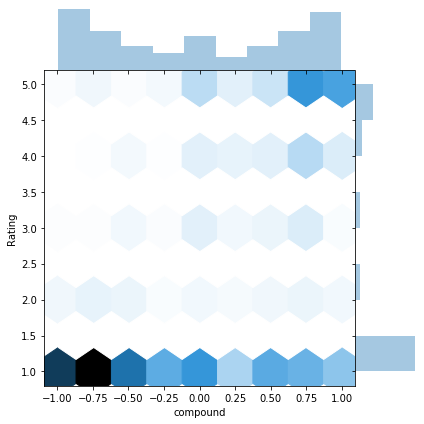

In [52]:
g = sns.jointplot("compound", "Rating", data=dataset, kind="hex",space=0)

In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(dataset['sentiment_score'],dataset['Rating_Change'])

0.6470994475138122

In [55]:
print(confusion_matrix(dataset['sentiment_score'],dataset['Rating_Change']))

[[616  15  28]
 [101  13  45]
 [283  39 308]]


In [56]:
print(classification_report(dataset['sentiment_score'],dataset['Rating_Change']))

              precision    recall  f1-score   support

    negative       0.62      0.93      0.74       659
      nutral       0.19      0.08      0.12       159
    positive       0.81      0.49      0.61       630

    accuracy                           0.65      1448
   macro avg       0.54      0.50      0.49      1448
weighted avg       0.65      0.65      0.62      1448



In [57]:
for i in dataset.index:
    if (dataset['sentiment_score'][i] != dataset['Rating_Change'][i]):
        print(f"Comment {i}:\n{dataset['Comment'][i]}\n\n sentiment_score:  {dataset['sentiment_score'][i]}    Rating_Change: {dataset['Rating_Change'][i]}") 
        print('\n +++++++++++++++++')

Comment 1:
    I ordered 3 pairs of shoes April 30. As expected shipment delays relating to COVID, but came at the dates (about 3 weeks later) expected and was updated frequently on any shipment updates. I also had to exchange one pair and customer service was patient. I had to be on hold as they placed the exchange order and the representative would come back every few minutes to update me that the system was taking a little long in placing the order. Also, I was disconnected twice during the call but was able to resume the order as the representatives were able to communicate with each other find where the order was left off. They were also very informative on the exchanging process and answered all of my questions.

 sentiment_score:  nutral    Rating_Change: positive

 +++++++++++++++++
Comment 2:
    If theres the option to give 0 star, I would. TERRIBLE customer service. I tried to place an order on the website but I kept getting error code. After attempting to speak with someone

In [64]:
test =  dataset.Comment[dataset['sentiment_score']=='positive']
s = ' '
text = s.join(test)

In [80]:
import re
#bannedWord = ['Nike','Lufthansa','flight','airline']
def RemoveBannedWords(toPrint,database):
    statement = toPrint
    pattern = re.compile("\\b(Nike|shoe|Lufthansa|flight|airline)\\W", re.I)
    return pattern.sub("", toPrint)


text = RemoveBannedWords(text,bannedWord)
text

'    sent me the ugliest shoes Ive ever seen - not at all like photos.  I went online to process the return, but they could not find my order, despite the items just arriving and me having a link in their email directly to the order, and having the order number.  Since there was no way to process the order online, I was required to call.  After putting me through a 5 minute message, they told me their offices are currently closed, despite it being 10am PST, and their message saying they are open from 4am-11am PST.  Then, they hang up.  So I try another number.  They put me through a 10 min message, and then tell me they cannot take my call due to high call volume, but I can go back onto their WEBSITE to leave my phone number to be called back.  I cannot do it on Nikes phone line like every other helpdesk can.  The only thing their message offers is to "call back later".  So, I go back to the site.  There is NOWHERE to leave a number for a call back.    There is a chatbot, so I click th

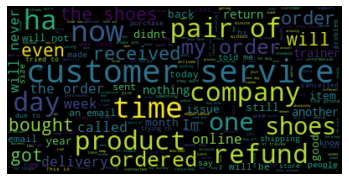

In [81]:
from wordcloud import WordCloud

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [82]:
test =  dataset.Comment[dataset['sentiment_score']=='negative']
s = ' '
text = s.join(test)

In [83]:
import re
bannedWord = ['Nike','nike','Lufthansa','flight','airline']
def RemoveBannedWords(toPrint,database):
    statement = toPrint
    pattern = re.compile("\\b(Nike|shoe|Lufthansa|flight|airline)\\W", re.I)
    return pattern.sub("", toPrint)



text = RemoveBannedWords(text,bannedWord)
text

'    sent me the ugliest shoes Ive ever seen - not at all like photos.  I went online to process the return, but they could not find my order, despite the items just arriving and me having a link in their email directly to the order, and having the order number.  Since there was no way to process the order online, I was required to call.  After putting me through a 5 minute message, they told me their offices are currently closed, despite it being 10am PST, and their message saying they are open from 4am-11am PST.  Then, they hang up.  So I try another number.  They put me through a 10 min message, and then tell me they cannot take my call due to high call volume, but I can go back onto their WEBSITE to leave my phone number to be called back.  I cannot do it on Nikes phone line like every other helpdesk can.  The only thing their message offers is to "call back later".  So, I go back to the site.  There is NOWHERE to leave a number for a call back.    There is a chatbot, so I click th

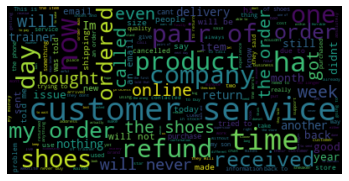

In [84]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**CountVectorizer**

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

In [86]:
# Discard the words that showed up  in 90% of comments
# at least show in 2 comments and remove stop words
cv = CountVectorizer(max_df=0.9, min_df=2,stop_words='english')

In [87]:
dtm = cv.fit_transform(dataset['Comment'])
dtm

<1448x3076 sparse matrix of type '<class 'numpy.int64'>'
	with 37857 stored elements in Compressed Sparse Row format>

In [88]:
from sklearn.decomposition import LatentDirichletAllocation

In [89]:
LDA = LatentDirichletAllocation(n_components=2) 
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=2, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [90]:
print(len(cv.get_feature_names()))
print(type(cv.get_feature_names()))

3076
<class 'list'>


In [91]:
#grab a vocabulary of words
cv.get_feature_names()[555]

'children'

In [92]:
print(LDA.components_.shape)

(2, 3076)


In [93]:
#grab the topic
print(LDA.components_)

[[ 0.99586027  7.52610057  0.54315034 ...  9.437134    7.23166536
   3.43955692]
 [21.00413973  1.47389943  4.45684966 ...  1.562866   14.76833464
   0.56044308]]


In [94]:
single_topic = LDA.components_[0]
single_topic.argsort()

array([ 385, 2652, 2574, ..., 2448,  474, 1802], dtype=int64)

In [95]:
#Argsort index positions sorted form least
# top 10
single_topic.argsort()[-10:]

array([ 891, 2119, 1228, 1495, 1592,  628, 2074, 2448,  474, 1802],
      dtype=int64)

In [97]:
top_ten =  single_topic.argsort()[-10:]
j = 1
for index in top_ten:
    print(j,"- ",cv.get_feature_names()[index])
    j+=1

1 -  dont
2 -  quality
3 -  good
4 -  just
5 -  like
6 -  company
7 -  products
8 -  shoes
9 -  buy
10 -  nike


**CountVectorizer + Sentiment** 

In [98]:
# store the data with positive and negative feeling inside the positive and negative variable
positive = dataset[dataset['sentiment_score']=='positive']
negative = dataset[dataset['sentiment_score']=='negative']
negative.head()

Rating                                 Title  \
3        1            Do NOT order from Nike.com   
4        1                     About 2 weeks ago   
6        1       Don't order from Nike direct if   
7        1  Put an order in on 11th May for some   
10       1                    NIKE ARE PATHETIC.   

                                              Comment        time  length  \
3       Nike sent me the ugliest shoes Ive ever se...  2020-05-18    1066   
4       About 2 weeks ago, Ive been trying to reso...  2020-05-18     840   
6       Dont order from Nike direct if possible. S...  2020-05-18     130   
7       Put an order in on 11th May for some train...  2020-05-18     243   
10      Absolutely pathetic company when it comes ...  2020-05-16     285   

                                               scores  compound  \
3   {'neg': 0.084, 'neu': 0.851, 'pos': 0.065, 'co...   -0.5940   
4   {'neg': 0.117, 'neu': 0.796, 'pos': 0.086, 'co...   -0.8604   
6   {'neg': 0.218, 'neu': 0.723, 'pos': 0.059, 'co...   -0.7430   
7   {'neg': 0.146, 'neu': 0.831, 'pos': 0.022, 'co...   -0.6956   
10  {'neg': 0.108, 'neu': 0.83, 'pos': 0.062, 'com...   -0.4104   

   sentiment_score Rating_Change  
3         negative      negative  
4         negative      negative  
6         negative      negative  
7         negative      negative  
10        negative      negative

In [99]:
cv = CountVectorizer(max_df=0.9, min_df=2,stop_words='english')
dtmPos = cv.fit_transform(negative['Comment'])

In [100]:
#10 is number of topics
LDA = LatentDirichletAllocation(n_components=2) 
LDA.fit(dtmPos)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=2, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [101]:
single_topic = LDA.components_[0]
single_topic.argsort()
single_topic.argsort()[-10:]

array([ 612, 1430, 1399, 1289,  289, 1001,  433,  319, 1657, 1214],
      dtype=int64)

In [102]:
#show the highest probility word per topic
top_ten =  single_topic.argsort()[-10:]
j = 1
for index in top_ten:
    print(j,"- ",cv.get_feature_names()[index])
    j+=1

1 -  dont
2 -  quality
3 -  products
4 -  pair
5 -  bought
6 -  just
7 -  company
8 -  buy
9 -  shoes
10 -  nike


In [103]:
cv = CountVectorizer(max_df=0.9, min_df=2,stop_words='english')
dtmNeg = cv.fit_transform(negative['Comment'])
LDA = LatentDirichletAllocation(n_components=2) 
LDA.fit(dtmNeg)
single_topic = LDA.components_[0]
#return the index position that is sorted from least to greatest (sort from lowest to highest value)
single_topic.argsort()
# the highest ones are the at the end of array (Top 10 Value)
single_topic.argsort()[-10:]
top_ten =  single_topic.argsort()[-10:]
j = 1
for index in top_ten:
    print(j,"- ",cv.get_feature_names()[index])
    j+=1

1 -  said
2 -  refund
3 -  days
4 -  told
5 -  pair
6 -  customer
7 -  service
8 -  shoes
9 -  order
10 -  nike


In [106]:
#Common words for each 2 topics that we choose for LDA!
for index, topic in enumerate (LDA.components_):
    print(f"The top 15 words for topic #{i}")
    print([cv.get_feature_names()[index] for index in topic.argsort()[-15:]])
    print('\n')
    print('\n')

The top 15 words for topic #1447
['received', 'email', 'ordered', 'time', 'just', 'said', 'refund', 'days', 'told', 'pair', 'customer', 'service', 'shoes', 'order', 'nike']




The top 15 words for topic #1447
['people', 'bought', 'flag', 'quality', 'product', 'customer', 'time', 'like', 'shoes', 'dont', 'products', 'just', 'buy', 'company', 'nike']






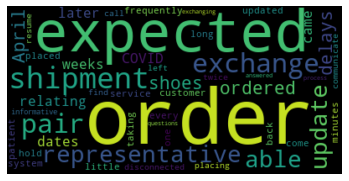

In [107]:
from wordcloud import WordCloud
# Start with one review:
text = dataset.Comment[1]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [108]:
test =  dataset['Comment']
s = ' '
text = s.join(test)

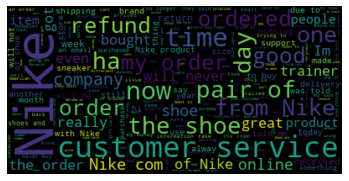

In [109]:
from wordcloud import WordCloud

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [113]:
text

'    I dont usually leave reviews but I waited on the phone for about an hour and wasnt really expecting to get such good customer service but LISA IS AN ABSOLUTE GEM, she gave me a discount on my custom shoes that werent exactly how I wanted and helped me get my other order figured out within 10 minutes, she deserves a raise!!     I ordered 3 pairs of shoes April 30. As expected shipment delays relating to COVID, but came at the dates (about 3 weeks later) expected and was updated frequently on any shipment updates. I also had to exchange one pair and customer service was patient. I had to be on hold as they placed the exchange order and the representative would come back every few minutes to update me that the system was taking a little long in placing the order. Also, I was disconnected twice during the call but was able to resume the order as the representatives were able to communicate with each other find where the order was left off. They were also very informative on the exchan

In [114]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Firoozeh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [115]:
# to tokenize the the whole comments I created only one string and add them together
from nltk.tokenize import word_tokenize
fullComment = ""
listRange = len(dataset)
#listRange = 10
for i in range(listRange):
    fullComment += dataset['Comment'][i] 
textTokenizer = word_tokenize(fullComment)
textTokenizer[:10]

['I', 'dont', 'usually', 'leave', 'reviews', 'but', 'I', 'waited', 'on', 'the']

In [116]:
# 64480 words in the comment section! 
len(textTokenizer)

122744

In [117]:
# changed the whole tokenized value to lower case and count them
from nltk.probability import FreqDist
frequency = FreqDist()
for word in textTokenizer:
    frequency[word.lower()]+=1

In [118]:
# 5738 unique word
print(len(frequency))
# Most common words with the highest frequency
topFreq = frequency.most_common(10)
print(topFreq)

7226
[('.', 5478), ('the', 4046), ('i', 3740), ('to', 3361), ('and', 3227), (',', 2539), ('a', 2518), ('nike', 1740), ('of', 1658), ('they', 1545)]


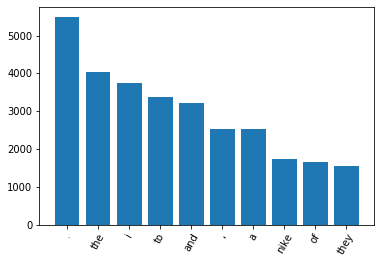

In [119]:
import matplotlib.pyplot as plt
plt.bar(range(len(topFreq)), [val[1] for val in topFreq], align='center')
plt.xticks(range(len(topFreq)), [val[0] for val in topFreq])
plt.xticks(rotation=60)
plt.show()

In [120]:
#Bigram
import nltk
CommentBigram = list(nltk.bigrams(textTokenizer))
CommentBigram[:10]

[('I', 'dont'),
 ('dont', 'usually'),
 ('usually', 'leave'),
 ('leave', 'reviews'),
 ('reviews', 'but'),
 ('but', 'I'),
 ('I', 'waited'),
 ('waited', 'on'),
 ('on', 'the'),
 ('the', 'phone')]

In [121]:
bigramTable = pd.DataFrame({'bigram': CommentBigram})
bigramTable.head()

bigram
0         (I, dont)
1   (dont, usually)
2  (usually, leave)
3  (leave, reviews)
4    (reviews, but)

In [122]:
# detect punctuation inside our arrays i[0] = index i[1] = array 
# phrase [ in case of error remove [i[0]] in front of 'punctDetect' to create a cloumn with that name and put [i[0]] again
bigramTable['punctDetect'] = ""
for i in bigramTable.itertuples():
    for x in range (2):
        print(i[1])
        if i[1][x] not in string.punctuation:
            bigramTable['punctDetect'][i[0]]  = "false"
            print("False")
        else:
            bigramTable['punctDetect'][i[0]] = "True"
            print("True")
            break

('I', 'dont')
False
('I', 'dont')
False
('dont', 'usually')
False
('dont', 'usually')
False
('usually', 'leave')
False
('usually', 'leave')
False
('leave', 'reviews')
False
('leave', 'reviews')
False
('reviews', 'but')
False
('reviews', 'but')
False
('but', 'I')
False
('but', 'I')
False
('I', 'waited')
False
('I', 'waited')
False
('waited', 'on')
False
('waited', 'on')
False
('on', 'the')
False
('on', 'the')
False
('the', 'phone')
False
('the', 'phone')
False
('phone', 'for')
False
('phone', 'for')
False
('for', 'about')
False
('for', 'about')
False
('about', 'an')
False
('about', 'an')
False
('an', 'hour')
False
('an', 'hour')
False
('hour', 'and')
False
('hour', 'and')
False
('and', 'wasnt')
False
('and', 'wasnt')
False
('wasnt', 'really')
False
('wasnt', 'really')
False
('really', 'expecting')
False
('really', 'expecting')
False
('expecting', 'to')
False
('expecting', 'to')
False
('to', 'get')
False
('to', 'get')
False
('get', 'such')
False
('get', 'such')
False
('such', 'good')
Fal

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



('I', 'get')
False
('I', 'get')
False
('get', 'an')
False
('get', 'an')
False
('an', 'email')
False
('an', 'email')
False
('email', 'saying')
False
('email', 'saying')
False
('saying', 'my')
False
('saying', 'my')
False
('my', 'order')
False
('my', 'order')
False
('order', 'is')
False
('order', 'is')
False
('is', 'cancelled')
False
('is', 'cancelled')
False
('cancelled', 'because')
False
('cancelled', 'because')
False
('because', 'theyre')
False
('because', 'theyre')
False
('theyre', 'out')
False
('theyre', 'out')
False
('out', 'of')
False
('out', 'of')
False
('of', 'stock')
False
('of', 'stock')
False
('stock', '36')
False
('stock', '36')
False
('36', 'days')
False
('36', 'days')
False
('days', 'later')
False
('days', 'later')
False
('later', '!')
False
('later', '!')
True
('!', '!')
True
('!', '!')
True
('!', '!')
True
('!', '!')
True
('!', 'Total')
True
('Total', 'waste')
False
('Total', 'waste')
False
('waste', 'of')
False
('waste', 'of')
False
('of', 'my')
False
('of', 'my')
False

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



('A', 'week')
False
('A', 'week')
False
('week', 'later')
False
('week', 'later')
False
('later', 'the')
False
('later', 'the')
False
('the', 'progress')
False
('the', 'progress')
False
('progress', 'with')
False
('progress', 'with')
False
('with', 'my')
False
('with', 'my')
False
('my', 'order')
False
('my', 'order')
False
('order', 'still')
False
('order', 'still')
False
('still', 'hasnt')
False
('still', 'hasnt')
False
('hasnt', 'updated')
False
('hasnt', 'updated')
False
('updated', '.')
False
('updated', '.')
True
('.', 'Waited')
True
('Waited', 'an')
False
('Waited', 'an')
False
('an', 'hour')
False
('an', 'hour')
False
('hour', 'to')
False
('hour', 'to')
False
('to', 'actually')
False
('to', 'actually')
False
('actually', 'speak')
False
('actually', 'speak')
False
('speak', 'to')
False
('speak', 'to')
False
('to', 'an')
False
('to', 'an')
False
('an', 'agent-')
False
('an', 'agent-')
False
('agent-', 'completely')
False
('agent-', 'completely')
False
('completely', 'rude')
False

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



False
('days', 'later')
False
('days', 'later')
False
('later', 'Nike')
False
('later', 'Nike')
False
('Nike', 'contacted')
False
('Nike', 'contacted')
False
('contacted', 'to')
False
('contacted', 'to')
False
('to', 'me')
False
('to', 'me')
False
('me', 'and')
False
('me', 'and')
False
('and', 'apologised')
False
('and', 'apologised')
False
('apologised', 'that')
False
('apologised', 'that')
False
('that', 'product')
False
('that', 'product')
False
('product', 'delayed')
False
('product', 'delayed')
False
('delayed', 'and')
False
('delayed', 'and')
False
('and', 'could')
False
('and', 'could')
False
('could', 'not')
False
('could', 'not')
False
('not', 'guarantee')
False
('not', 'guarantee')
False
('guarantee', 'by')
False
('guarantee', 'by')
False
('by', '30/3')
False
('by', '30/3')
False
('30/3', '.')
False
('30/3', '.')
True
('.', 'Although')
True
('Although', 'disappointed')
False
('Although', 'disappointed')
False
('disappointed', 'it')
False
('disappointed', 'it')
False
('it', '

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




('were', 'told')
False
('told', 'they')
False
('told', 'they')
False
('they', 'had')
False
('they', 'had')
False
('had', 'tried')
False
('had', 'tried')
False
('tried', 'to')
False
('tried', 'to')
False
('to', 'deliver')
False
('to', 'deliver')
False
('deliver', 'them')
False
('deliver', 'them')
False
('them', 'but')
False
('them', 'but')
False
('but', 'couldnt')
False
('but', 'couldnt')
False
('couldnt', 'find')
False
('couldnt', 'find')
False
('find', 'the')
False
('find', 'the')
False
('the', 'address')
False
('the', 'address')
False
('address', 'so')
False
('address', 'so')
False
('so', 'instead')
False
('so', 'instead')
False
('instead', 'of')
False
('instead', 'of')
False
('of', 'ringing')
False
('of', 'ringing')
False
('ringing', 'the')
False
('ringing', 'the')
False
('the', 'number')
False
('the', 'number')
False
('number', 'on')
False
('number', 'on')
False
('on', 'the')
False
('on', 'the')
False
('the', 'order')
False
('the', 'order')
False
('order', 'they')
False
('order', 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



('clue', 'whats')
False
('clue', 'whats')
False
('whats', 'going')
False
('whats', 'going')
False
('going', 'and')
False
('going', 'and')
False
('and', 'do')
False
('and', 'do')
False
('do', 'not')
False
('do', 'not')
False
('not', 'care')
False
('not', 'care')
False
('care', 'about')
False
('care', 'about')
False
('about', 'your')
False
('about', 'your')
False
('your', 'issue')
False
('your', 'issue')
False
('issue', ',')
False
('issue', ',')
True
(',', 'all')
True
('all', 'they')
False
('all', 'they')
False
('they', 'tell')
False
('they', 'tell')
False
('tell', 'you')
False
('tell', 'you')
False
('you', 'is')
False
('you', 'is')
False
('is', 'that')
False
('is', 'that')
False
('that', 'the')
False
('that', 'the')
False
('the', 'issue')
False
('the', 'issue')
False
('issue', 'will')
False
('issue', 'will')
False
('will', 'be')
False
('will', 'be')
False
('be', 'escalated')
False
('be', 'escalated')
False
('escalated', ',')
False
('escalated', ',')
True
(',', 'to')
True
('to', 'what')


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




('have', 'ever')
False
('have', 'ever')
False
('ever', 'experienced')
False
('ever', 'experienced')
False
('experienced', '.')
False
('experienced', '.')
True
('.', 'Also')
True
('Also', 'super')
False
('Also', 'super')
False
('super', 'fast')
False
('super', 'fast')
False
('fast', 'delivery')
False
('fast', 'delivery')
False
('delivery', 'and')
False
('delivery', 'and')
False
('and', 'returns')
False
('and', 'returns')
False
('returns', '.')
False
('returns', '.')
True
('.', 'I')
True
('I', 'am')
False
('I', 'am')
False
('am', 'not')
False
('am', 'not')
False
('not', 'buying')
False
('not', 'buying')
False
('buying', 'nike')
False
('buying', 'nike')
False
('nike', 'anymore')
False
('nike', 'anymore')
False
('anymore', 'because')
False
('anymore', 'because')
False
('because', 'of')
False
('because', 'of')
False
('of', 'colin')
False
('of', 'colin')
False
('colin', 'kaepernick')
False
('colin', 'kaepernick')
False
('kaepernick', 'and')
False
('kaepernick', 'and')
False
('and', 'not')
F

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




False
('had', 'not')
False
('had', 'not')
False
('not', 'heard')
False
('not', 'heard')
False
('heard', 'a')
False
('heard', 'a')
False
('a', 'thing')
False
('a', 'thing')
False
('thing', 'from')
False
('thing', 'from')
False
('from', 'them')
False
('from', 'them')
False
('them', '.')
False
('them', '.')
True
('.', 'They')
True
('They', 'replied')
False
('They', 'replied')
False
('replied', 'on')
False
('replied', 'on')
False
('on', 'August')
False
('on', 'August')
False
('August', '7')
False
('August', '7')
False
('7', ',')
False
('7', ',')
True
(',', '2019')
True
('2019', 'with')
False
('2019', 'with')
False
('with', '``')
False
('with', '``')
False
('``', 'Please')
False
('``', 'Please')
False
('Please', 'be')
False
('Please', 'be')
False
('be', 'advised')
False
('be', 'advised')
False
('advised', ':')
False
('advised', ':')
True
(':', 'Blank')
True
('Blank', 'stock')
False
('Blank', 'stock')
False
('stock', 'product')
False
('stock', 'product')
False
('product', '(')
False
('produ

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



('arrived', '...')
False
('...', 'With')
False
('...', 'With')
False
('With', 'exactly')
False
('With', 'exactly')
False
('exactly', 'the')
False
('exactly', 'the')
False
('the', 'same')
False
('the', 'same')
False
('same', 'problem')
False
('same', 'problem')
False
('problem', '.')
False
('problem', '.')
True
('.', 'I')
True
('I', 'contacted')
False
('I', 'contacted')
False
('contacted', 'support')
False
('contacted', 'support')
False
('support', 'again')
False
('support', 'again')
False
('again', ',')
False
('again', ',')
True
(',', 'and')
True
('and', 'they')
False
('and', 'they')
False
('they', 'told')
False
('they', 'told')
False
('told', 'me')
False
('told', 'me')
False
('me', 'that')
False
('me', 'that')
False
('that', 'this')
False
('that', 'this')
False
('this', 'was')
False
('this', 'was')
False
('was', 'actually')
False
('was', 'actually')
False
('actually', 'how')
False
('actually', 'how')
False
('how', 'the')
False
('how', 'the')
False
('the', 'shoes')
False
('the', 'shoes

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



False
('on', 'hold')
False
('hold', 'for')
False
('hold', 'for')
False
('for', 'a')
False
('for', 'a')
False
('a', 'long')
False
('a', 'long')
False
('long', 'period')
False
('long', 'period')
False
('period', '.')
False
('period', '.')
True
('.', 'Ill')
True
('Ill', 'be')
False
('Ill', 'be')
False
('be', 'purchasing')
False
('be', 'purchasing')
False
('purchasing', 'my')
False
('purchasing', 'my')
False
('my', 'sportswear')
False
('my', 'sportswear')
False
('sportswear', 'from')
False
('sportswear', 'from')
False
('from', 'somewhere')
False
('from', 'somewhere')
False
('somewhere', 'else')
False
('somewhere', 'else')
False
('else', '.')
False
('else', '.')
True
('.', 'If')
True
('If', 'youre')
False
('If', 'youre')
False
('youre', 'looking')
False
('youre', 'looking')
False
('looking', 'for')
False
('looking', 'for')
False
('for', 'good')
False
('for', 'good')
False
('good', 'quality')
False
('good', 'quality')
False
('quality', ',')
False
('quality', ',')
True
(',', 'highly')
True
('

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




False
('was', 'done')
False
('done', '!')
False
('done', '!')
True
('!', 'its')
True
('its', 'been')
False
('its', 'been')
False
('been', '12')
False
('been', '12')
False
('12', 'days')
False
('12', 'days')
False
('days', '.')
False
('days', '.')
True
('.', 'It')
True
('It', 'use')
False
('It', 'use')
False
('use', 'to')
False
('use', 'to')
False
('to', 'be')
False
('to', 'be')
False
('be', 'great')
False
('be', 'great')
False
('great', 'to')
False
('great', 'to')
False
('to', 'wear')
False
('to', 'wear')
False
('wear', 'NIKE')
False
('wear', 'NIKE')
False
('NIKE', ',')
False
('NIKE', ',')
True
(',', 'I')
True
('I', 'have')
False
('I', 'have')
False
('have', 'not')
False
('have', 'not')
False
('not', 'had')
False
('not', 'had')
False
('had', 'a')
False
('had', 'a')
False
('a', 'problem')
False
('a', 'problem')
False
('problem', 'of')
False
('problem', 'of')
False
('of', 'a')
False
('of', 'a')
False
('a', 'day')
False
('a', 'day')
False
('day', 'old')
False
('day', 'old')
False
('old',

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



False
('on', 'your')
False
('on', 'your')
False
('your', 'payroll')
False
('your', 'payroll')
False
('payroll', '.')
False
('payroll', '.')
True
('.', 'I')
True
('I', 'will')
False
('I', 'will')
False
('will', 'never')
False
('will', 'never')
False
('never', 'buy')
False
('never', 'buy')
False
('buy', 'anymore')
False
('buy', 'anymore')
False
('anymore', 'of')
False
('anymore', 'of')
False
('of', 'your')
False
('of', 'your')
False
('your', 'products')
False
('your', 'products')
False
('products', '.')
False
('products', '.')
True
('.', 'I')
True
('I', 'will')
False
('I', 'will')
False
('will', 'spread')
False
('will', 'spread')
False
('spread', 'your')
False
('spread', 'your')
False
('your', 'shameful')
False
('your', 'shameful')
False
('shameful', 'choice')
False
('shameful', 'choice')
False
('choice', 'to')
False
('choice', 'to')
False
('to', 'all')
False
('to', 'all')
False
('all', 'I')
False
('all', 'I')
False
('I', 'know')
False
('I', 'know')
False
('know', '.')
False
('know', '.'

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



('delivery', 'and')
False
('delivery', 'and')
False
('and', 'didnt')
False
('and', 'didnt')
False
('didnt', 'hear')
False
('didnt', 'hear')
False
('hear', 'any')
False
('hear', 'any')
False
('any', 'ring')
False
('any', 'ring')
False
('ring', 'on')
False
('ring', 'on')
False
('on', 'my')
False
('on', 'my')
False
('my', 'bell')
False
('my', 'bell')
False
('bell', 'or')
False
('bell', 'or')
False
('or', 'receive')
False
('or', 'receive')
False
('receive', 'any')
False
('receive', 'any')
False
('any', 'updates')
False
('any', 'updates')
False
('updates', '.')
False
('updates', '.')
True
('.', 'It')
True
('It', 'is')
False
('It', 'is')
False
('is', 'frustrating')
False
('is', 'frustrating')
False
('frustrating', 'that')
False
('frustrating', 'that')
False
('that', 'I')
False
('that', 'I')
False
('I', 'have')
False
('I', 'have')
False
('have', 'to')
False
('have', 'to')
False
('to', 'call')
False
('to', 'call')
False
('call', 'DHL')
False
('call', 'DHL')
False
('DHL', 'to')
False
('DHL', 't

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



('someone', 'elses')
False
('someone', 'elses')
False
('elses', 'receipt')
False
('elses', 'receipt')
False
('receipt', 'in')
False
('receipt', 'in')
False
('in', 'the')
False
('in', 'the')
False
('the', 'box')
False
('the', 'box')
False
('box', '.')
False
('box', '.')
True
('.', 'I')
True
('I', 'had')
False
('I', 'had')
False
('had', 'to')
False
('had', 'to')
False
('to', 'call')
False
('to', 'call')
False
('call', 'customer')
False
('call', 'customer')
False
('customer', 'service')
False
('customer', 'service')
False
('service', 'to')
False
('service', 'to')
False
('to', 'get')
False
('to', 'get')
False
('get', 'my')
False
('get', 'my')
False
('my', 'correct')
False
('my', 'correct')
False
('correct', 'receipt')
False
('correct', 'receipt')
False
('receipt', 'and')
False
('receipt', 'and')
False
('and', 'shipping')
False
('and', 'shipping')
False
('shipping', 'label')
False
('shipping', 'label')
False
('label', 'e-mailed')
False
('label', 'e-mailed')
False
('e-mailed', 'to')
False
('

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




False
('and', 'was')
False
('was', 'informed')
False
('was', 'informed')
False
('informed', 'there')
False
('informed', 'there')
False
('there', 'was')
False
('there', 'was')
False
('was', 'a')
False
('was', 'a')
False
('a', 'delay')
False
('a', 'delay')
False
('delay', 'at')
False
('delay', 'at')
False
('at', 'shipping')
False
('at', 'shipping')
False
('shipping', 'my')
False
('shipping', 'my')
False
('my', 'order')
False
('my', 'order')
False
('order', 'and')
False
('order', 'and')
False
('and', 'they')
False
('and', 'they')
False
('they', 'would')
False
('they', 'would')
False
('would', 'escalate')
False
('would', 'escalate')
False
('escalate', 'the')
False
('escalate', 'the')
False
('the', 'problem')
False
('the', 'problem')
False
('problem', 'so')
False
('problem', 'so')
False
('so', 'it')
False
('so', 'it')
False
('it', 'could')
False
('it', 'could')
False
('could', 'be')
False
('could', 'be')
False
('be', 'shipped')
False
('be', 'shipped')
False
('shipped', 'ASAP')
False
('ship

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




('to', 'see')
False
('see', 'how')
False
('see', 'how')
False
('how', 'my')
False
('how', 'my')
False
('my', 'orders')
False
('my', 'orders')
False
('orders', 'looked')
False
('orders', 'looked')
False
('looked', '.')
False
('looked', '.')
True
('.', 'ordered')
True
('ordered', 'football')
False
('ordered', 'football')
False
('football', 'boots')
False
('football', 'boots')
False
('boots', 'on')
False
('boots', 'on')
False
('on', 'Saturday')
False
('on', 'Saturday')
False
('Saturday', 'night')
False
('Saturday', 'night')
False
('night', '-')
False
('night', '-')
True
('-', 'cheaper')
True
('cheaper', 'than')
False
('cheaper', 'than')
False
('than', 'anywhere')
False
('than', 'anywhere')
False
('anywhere', 'else')
False
('anywhere', 'else')
False
('else', '-')
False
('else', '-')
True
('-', 'were')
True
('were', 'delivered')
False
('were', 'delivered')
False
('delivered', 'by')
False
('delivered', 'by')
False
('by', 'Monday')
False
('by', 'Monday')
False
('Monday', '-')
False
('Monday'

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




('in', 'the')
False
('in', 'the')
False
('the', 'near')
False
('the', 'near')
False
('near', 'future')
False
('near', 'future')
False
('future', '.')
False
('future', '.')
True
('.', 'absolute')
True
('absolute', 'joke')
False
('absolute', 'joke')
False
('joke', '!')
False
('joke', '!')
True
('!', 'keep')
True
('keep', 'removing')
False
('keep', 'removing')
False
('removing', 'things')
False
('removing', 'things')
False
('things', 'from')
False
('things', 'from')
False
('from', 'my')
False
('from', 'my')
False
('my', 'basket')
False
('my', 'basket')
False
('basket', 'or')
False
('basket', 'or')
False
('or', 'add')
False
('or', 'add')
False
('add', 'and')
False
('add', 'and')
False
('and', 'when')
False
('and', 'when')
False
('when', 'i')
False
('when', 'i')
False
('i', 'pay')
False
('i', 'pay')
False
('pay', 'i')
False
('pay', 'i')
False
('i', 'sais')
False
('i', 'sais')
False
('sais', 'out')
False
('sais', 'out')
False
('out', 'of')
False
('out', 'of')
False
('of', 'stock')
False
('o

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



False
('Nike.com', 'because')
False
('Nike.com', 'because')
False
('because', 'I')
False
('because', 'I')
False
('I', 'had')
False
('I', 'had')
False
('had', 'an')
False
('had', 'an')
False
('an', 'issue')
False
('an', 'issue')
False
('issue', 'with')
False
('issue', 'with')
False
('with', 'some')
False
('with', 'some')
False
('some', 'converse')
False
('some', 'converse')
False
('converse', 'I')
False
('converse', 'I')
False
('I', 'purchased')
False
('I', 'purchased')
False
('purchased', '.')
False
('purchased', '.')
True
('.', 'I')
True
('I', 'order')
False
('I', 'order')
False
('order', 'my')
False
('order', 'my')
False
('my', 'converse')
False
('my', 'converse')
False
('converse', 'to')
False
('converse', 'to')
False
('to', 'get')
False
('to', 'get')
False
('get', 'blinged')
False
('get', 'blinged')
False
('blinged', 'out')
False
('blinged', 'out')
False
('out', 'for')
False
('out', 'for')
False
('for', 'my')
False
('for', 'my')
False
('my', 'wedding')
False
('my', 'wedding')
False

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




False
('to', 'another')
False
('another', '2')
False
('another', '2')
False
('2', 'people')
False
('2', 'people')
False
('people', 'after')
False
('people', 'after')
False
('after', 'him')
False
('after', 'him')
False
('him', 'as')
False
('him', 'as')
False
('as', 'the')
False
('as', 'the')
False
('the', 'lines')
False
('the', 'lines')
False
('lines', 'went')
False
('lines', 'went')
False
('went', 'down')
False
('went', 'down')
False
('down', 'and')
False
('down', 'and')
False
('and', 'was')
False
('and', 'was')
False
('was', 'told')
False
('was', 'told')
False
('told', 'it')
False
('told', 'it')
False
('it', 'would')
False
('it', 'would')
False
('would', 'be')
False
('would', 'be')
False
('be', 'done')
False
('be', 'done')
False
('done', 'on')
False
('done', 'on')
False
('on', 'Saturday')
False
('on', 'Saturday')
False
('Saturday', '.')
False
('Saturday', '.')
True
('.', 'I')
True
('I', 'called')
False
('I', 'called')
False
('called', 'today')
False
('called', 'today')
False
('today'

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




('supposed', 'to')
False
('supposed', 'to')
False
('to', 'be')
False
('to', 'be')
False
('be', 'receiving')
False
('be', 'receiving')
False
('receiving', 'them')
False
('receiving', 'them')
False
('them', 'in')
False
('them', 'in')
False
('in', 'a')
False
('in', 'a')
False
('a', 'week')
False
('a', 'week')
False
('week', 'they')
False
('week', 'they')
False
('they', 'said')
False
('they', 'said')
False
('said', 'they')
False
('said', 'they')
False
('they', 'didnt')
False
('they', 'didnt')
False
('didnt', 'have')
False
('didnt', 'have')
False
('have', 'my')
False
('have', 'my')
False
('my', 'size')
False
('my', 'size')
False
('size', '...')
False
('size', '...')
False
('...', 'they')
False
('...', 'they')
False
('they', 'were')
False
('they', 'were')
False
('were', 'absolutely')
False
('were', 'absolutely')
False
('absolutely', 'no')
False
('absolutely', 'no')
False
('no', 'help')
False
('no', 'help')
False
('help', 'in')
False
('help', 'in')
False
('in', 'getting')
False
('in', 'getti

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




False
('that', '.')
False
('that', '.')
True
('.', 'No')
True
('No', 'explaining')
False
('No', 'explaining')
False
('explaining', 'in')
False
('explaining', 'in')
False
('in', 'why')
False
('in', 'why')
False
('why', 'I')
False
('why', 'I')
False
('I', 'returned')
False
('I', 'returned')
False
('returned', 'the')
False
('returned', 'the')
False
('the', 'item')
False
('the', 'item')
False
('item', ',')
False
('item', ',')
True
(',', 'no')
True
('no', 'extra')
False
('no', 'extra')
False
('extra', 'forms')
False
('extra', 'forms')
False
('forms', 'to')
False
('forms', 'to')
False
('to', 'fill')
False
('to', 'fill')
False
('fill', 'in')
False
('fill', 'in')
False
('in', '...')
False
('in', '...')
False
('...', 'I')
False
('...', 'I')
False
('I', 'dropped')
False
('I', 'dropped')
False
('dropped', 'the')
False
('dropped', 'the')
False
('the', 'box')
False
('the', 'box')
False
('box', 'at')
False
('box', 'at')
False
('at', 'the')
False
('at', 'the')
False
('the', 'post')
False
('the', 'po

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




False
('was', 'sent')
False
('was', 'sent')
False
('sent', 'what')
False
('sent', 'what')
False
('what', 'look')
False
('what', 'look')
False
('look', 'like')
False
('look', 'like')
False
('like', 'used')
False
('like', 'used')
False
('used', 'trainers')
False
('used', 'trainers')
False
('trainers', 'with')
False
('trainers', 'with')
False
('with', 'scuffs')
False
('with', 'scuffs')
False
('scuffs', 'so')
False
('scuffs', 'so')
False
('so', 'returned')
False
('so', 'returned')
False
('returned', 'them')
False
('returned', 'them')
False
('them', 'at')
False
('them', 'at')
False
('at', 'my')
False
('at', 'my')
False
('my', 'own')
False
('my', 'own')
False
('own', 'cost')
False
('own', 'cost')
False
('cost', 'as')
False
('cost', 'as')
False
('as', 'they')
False
('as', 'they')
False
('they', 'would')
False
('they', 'would')
False
('would', 'not')
False
('would', 'not')
False
('not', 'provide')
False
('not', 'provide')
False
('provide', 'me')
False
('provide', 'me')
False
('me', 'with')
Fa

In [123]:
bigramTable.tail(10)

In [124]:
# phrase [ in case of error remove [i[0]] in front of 'phrase' to create a cloumn with that name and put [i[0]] again]
bigramTable['phrase'] =''
for i in bigramTable.itertuples():
    bigramTable['phrase'][i[0]] = i[1][0] + " " + i[1][1] 
bigramTable.head(10)

bigram punctDetect         phrase
0         (I, dont)       false         I dont
1   (dont, usually)       false   dont usually
2  (usually, leave)       false  usually leave
3  (leave, reviews)       false  leave reviews
4    (reviews, but)       false    reviews but
5          (but, I)       false          but I
6       (I, waited)       false       I waited
7      (waited, on)       false      waited on
8         (on, the)       false         on the
9      (the, phone)       false      the phone

In [125]:
bigramTable = bigramTable[bigramTable['punctDetect'] == "false"]
bigramTable.head(20)

bigram punctDetect            phrase
0             (I, dont)       false            I dont
1       (dont, usually)       false      dont usually
2      (usually, leave)       false     usually leave
3      (leave, reviews)       false     leave reviews
4        (reviews, but)       false       reviews but
5              (but, I)       false             but I
6           (I, waited)       false          I waited
7          (waited, on)       false         waited on
8             (on, the)       false            on the
9          (the, phone)       false         the phone
10         (phone, for)       false         phone for
11         (for, about)       false         for about
12          (about, an)       false          about an
13           (an, hour)       false           an hour
14          (hour, and)       false          hour and
15         (and, wasnt)       false         and wasnt
16      (wasnt, really)       false      wasnt really
17  (really, expecting)       false  really expecting
18      (expecting, to)       false      expecting to
19            (to, get)       false            to get

In [126]:
print (bigramTable['phrase'].value_counts().head(10))

I have              301
customer service    291
of the              232
in the              232
on the              231
I was               219
pair of             216
I will              215
and they            208
to be               191
Name: phrase, dtype: int64


In [127]:
#Lower_case!
bigramTable['phrase'] = bigramTable['phrase'].apply(lambda x: x.lower())
bigramTable.head(10)

bigram punctDetect         phrase
0         (I, dont)       false         i dont
1   (dont, usually)       false   dont usually
2  (usually, leave)       false  usually leave
3  (leave, reviews)       false  leave reviews
4    (reviews, but)       false    reviews but
5          (but, I)       false          but i
6       (I, waited)       false       i waited
7      (waited, on)       false      waited on
8         (on, the)       false         on the
9      (the, phone)       false      the phone

In [128]:
print (bigramTable['phrase'].value_counts().head(10))

customer service    331
i have              326
on the              242
in the              240
i was               238
of the              234
i will              227
and i               221
pair of             217
and they            212
Name: phrase, dtype: int64


In [133]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Firoozeh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Firoozeh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [134]:
import re 
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
lm = nltk.WordNetLemmatizer()
def clean_text(text):
    text = "".join((word.lower() for word in text if word not in string.punctuation))
    tokens = re.split('\W', text)
    #text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
    text = " ".join([lm.lemmatize(word,pos="v") for word in tokens if word not in stopwords])
    return text

dataset['lemme'] = dataset['Comment'].apply(lambda x: clean_text(x))
dataset.head()

Rating                                      Title  \
0       5  I don&#8217;t usually leave reviews but I   
1       5                      Good Customer Service   
2       1       If there's the option to give 0 star   
3       1                 Do NOT order from Nike.com   
4       1                          About 2 weeks ago   

                                             Comment        time  length  \
0      I dont usually leave reviews but I waited ...  2020-05-18     263   
1      I ordered 3 pairs of shoes April 30. As ex...  2020-05-18     585   
2      If theres the option to give 0 star, I wou...  2020-05-18     924   
3      Nike sent me the ugliest shoes Ive ever se...  2020-05-18    1066   
4      About 2 weeks ago, Ive been trying to reso...  2020-05-18     840   

                                              scores  compound  \
0  {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...    0.6713   
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   
2  {'neg': 0.056, 'neu': 0.86, 'pos': 0.084, 'com...    0.7234   
3  {'neg': 0.084, 'neu': 0.851, 'pos': 0.065, 'co...   -0.5940   
4  {'neg': 0.117, 'neu': 0.796, 'pos': 0.086, 'co...   -0.8604   

  sentiment_score Rating_Change  \
0        positive      positive   
1          nutral      positive   
2        positive      negative   
3        negative      negative   
4        negative      negative   

                                               lemme  
0      dont usually leave review wait phone hour ...  
1      order 3 pair shoe april 30 expect shipment...  
2      theres option give 0 star would terrible c...  
3      nike send ugliest shoe ive ever see  like ...  
4      2 weeks ago ive try resolve issue nikecom ...

In [135]:
# to tokenize the the whole comments I created only one string and add them together
from nltk.tokenize import word_tokenize
fullComment = ""
listRange = len(dataset)
#listRange = 14
for i in range(listRange):
    fullComment += dataset['lemme'][i] 
textTokenizer = word_tokenize(fullComment)
textTokenizer[:10]

['dont',
 'usually',
 'leave',
 'review',
 'wait',
 'phone',
 'hour',
 'wasnt',
 'really',
 'expect']

In [136]:
from nltk.probability import FreqDist
frequency = FreqDist()
for word in textTokenizer:
    frequency[word.lower()]+=1

In [137]:
# 507 unique word
print(len(frequency))
# Most common words with the highest frequency
topFreq = frequency.most_common(10)
print(topFreq)

5670
[('nike', 1742), ('order', 1000), ('shoe', 890), ('get', 640), ('buy', 620), ('service', 536), ('customer', 493), ('time', 439), ('say', 414), ('pair', 392)]


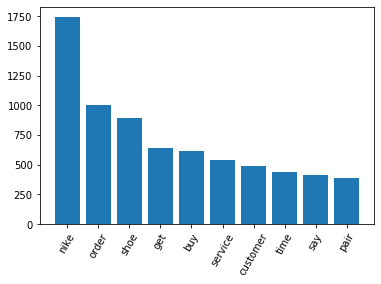

In [138]:
import matplotlib.pyplot as plt
plt.bar(range(len(topFreq)), [val[1] for val in topFreq], align='center')
plt.xticks(range(len(topFreq)), [val[0] for val in topFreq])
plt.xticks(rotation=60)
plt.show()

In [139]:
#Bigram
CommentBigram = list(nltk.bigrams(textTokenizer))
newBigramTable = pd.DataFrame({'bigram': CommentBigram})
newBigramTable.head(10)

bigram
0   (dont, usually)
1  (usually, leave)
2   (leave, review)
3    (review, wait)
4     (wait, phone)
5     (phone, hour)
6     (hour, wasnt)
7   (wasnt, really)
8  (really, expect)
9     (expect, get)

In [140]:
print (newBigramTable['bigram'].value_counts().head(10))

(customer, service)    354
(buy, nike)            122
(never, buy)            84
(place, order)          82
(nike, products)        66
(pair, shoe)            61
(nike, shoe)            55
(pair, nike)            55
(order, nike)           53
(cancel, order)         52
Name: bigram, dtype: int64


In [141]:
import re 
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
lm = nltk.WordNetLemmatizer()
def clean_text(text):
    text = "".join((word.lower() for word in text if word not in string.punctuation))
    tokens = re.split('\W', text)
    #text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
    #text = " ".join([lm.lemmatize(word,pos="v") for word in tokens if word not in stopwords])
    return text

dataset['lemme'] = dataset['Comment'].apply(lambda x: clean_text(x))
dataset.head()

Rating                                      Title  \
0       5  I don&#8217;t usually leave reviews but I   
1       5                      Good Customer Service   
2       1       If there's the option to give 0 star   
3       1                 Do NOT order from Nike.com   
4       1                          About 2 weeks ago   

                                             Comment        time  length  \
0      I dont usually leave reviews but I waited ...  2020-05-18     263   
1      I ordered 3 pairs of shoes April 30. As ex...  2020-05-18     585   
2      If theres the option to give 0 star, I wou...  2020-05-18     924   
3      Nike sent me the ugliest shoes Ive ever se...  2020-05-18    1066   
4      About 2 weeks ago, Ive been trying to reso...  2020-05-18     840   

                                              scores  compound  \
0  {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...    0.6713   
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   
2  {'neg': 0.056, 'neu': 0.86, 'pos': 0.084, 'com...    0.7234   
3  {'neg': 0.084, 'neu': 0.851, 'pos': 0.065, 'co...   -0.5940   
4  {'neg': 0.117, 'neu': 0.796, 'pos': 0.086, 'co...   -0.8604   

  sentiment_score Rating_Change  \
0        positive      positive   
1          nutral      positive   
2        positive      negative   
3        negative      negative   
4        negative      negative   

                                               lemme  
0      i dont usually leave reviews but i waited ...  
1      i ordered 3 pairs of shoes april 30 as exp...  
2      if theres the option to give 0 star i woul...  
3      nike sent me the ugliest shoes ive ever se...  
4      about 2 weeks ago ive been trying to resol...

In [142]:
# to tokenize the the whole comments I created only one string and add them together
from nltk.tokenize import word_tokenize
fullComment = ""
listRange = len(dataset)
#listRange = 14
for i in range(listRange):
    fullComment += dataset['lemme'][i] 
textTokenizer = word_tokenize(fullComment)
textTokenizer[:10]

['i', 'dont', 'usually', 'leave', 'reviews', 'but', 'i', 'waited', 'on', 'the']

In [143]:
from nltk.probability import FreqDist
frequency = FreqDist()
for word in textTokenizer:
    frequency[word.lower()]+=1

In [144]:
# 507 unique word
print(len(frequency))
# Most common words with the highest frequency
topFreq = frequency.most_common(10)
print(topFreq)

7068
[('the', 4042), ('i', 3740), ('to', 3359), ('and', 3225), ('a', 2519), ('nike', 1742), ('of', 1658), ('they', 1540), ('my', 1461), ('for', 1419)]


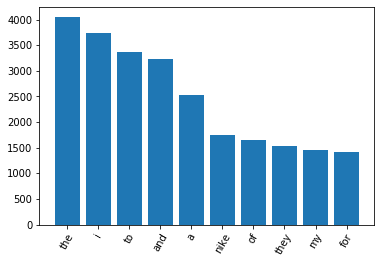

In [145]:
import matplotlib.pyplot as plt
plt.bar(range(len(topFreq)), [val[1] for val in topFreq], align='center')
plt.xticks(range(len(topFreq)), [val[0] for val in topFreq])
plt.xticks(rotation=60)
plt.show()

In [146]:
#Bigram
CommentBigram = list(nltk.bigrams(textTokenizer))
newBigramTable = pd.DataFrame({'bigram': CommentBigram})
newBigramTable.head(10)

bigram
0         (i, dont)
1   (dont, usually)
2  (usually, leave)
3  (leave, reviews)
4    (reviews, but)
5          (but, i)
6       (i, waited)
7      (waited, on)
8         (on, the)
9      (the, phone)

In [147]:
print (newBigramTable['bigram'].value_counts().head(10))

(customer, service)    332
(i, have)              326
(on, the)              244
(in, the)              241
(i, was)               237
(of, the)              234
(i, will)              227
(and, i)               222
(pair, of)             217
(and, they)            213
Name: bigram, dtype: int64


In [148]:
str = "This is a sample text for 522 project. Contrary to? popular ! belief, Lorem Ipsum is not simply random text."
nltk.word_tokenize(str)

['This',
 'is',
 'a',
 'sample',
 'text',
 'for',
 '522',
 'project',
 '.',
 'Contrary',
 'to',
 '?',
 'popular',
 '!',
 'belief',
 ',',
 'Lorem',
 'Ipsum',
 'is',
 'not',
 'simply',
 'random',
 'text',
 '.']

In [149]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()
tokenizer = Tokenizer(nlp.vocab)
tokens = tokenizer(str)
for token in tokens:
    print(token)

This
is
a
sample
text
for
522
project.
Contrary
to?
popular
!
belief,
Lorem
Ipsum
is
not
simply
random
text.
